In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import seaborn as sns
sns.set(style="ticks")
import numpy as np
from scipy import stats

In [3]:
strain = '116A'

In [4]:
data = pd.read_csv('/Users/nwespe/Dropbox/Research - Data/PG HU Experiments/HU_results/'+strain+'_results.csv', converters ={'Date': lambda x: str(x), 'Strain': lambda x: str(x)})

In [5]:
data['Strain'] = strain

In [6]:
data[:5]

,Unnamed: 0,,Area,Dilution,Date,Well,Strain,Condition,Time
0,0,1,5424,1,20160519,G5,116A,YPD,start
1,1,2,4145,2,20160519,G5,116A,YPD,start
2,2,3,3886,3,20160519,G5,116A,YPD,start
3,3,4,2123,4,20160519,G5,116A,YPD,start
4,4,5,2577,1,20160519,G5,116A,YPD,end


In [7]:
start = data[(data.Time == 'start')]
end = data[(data.Time == 'end')]
results = pd.merge(start, end, how='left', on=('Date', 'Well', 'Strain', 'Condition', 'Dilution'), sort=False, \
                   suffixes=['_start', '_end'])
results = results[['Date', 'Well', 'Strain', 'Condition', 'Dilution', 'Area_start', 'Area_end']]
results['Ratio'] = results['Area_end'] / results['Area_start']
results['Sample'] = results['Date'] + ' ' + results['Well']

In [8]:
results_0614 = results[results['Date']=='20160614'] #data = data[data.strain != 'blank']
results_0614

,Date,Well,Strain,Condition,Dilution,Area_start,Area_end,Ratio,Sample
128,20160614,G1,116A,YPD,1,6942,5682,0.818496,20160614 G1
129,20160614,G1,116A,YPD,2,5809,4778,0.822517,20160614 G1
130,20160614,G1,116A,YPD,3,5318,2091,0.393193,20160614 G1
131,20160614,G1,116A,YPD,4,3622,3388,0.935395,20160614 G1
132,20160614,G2,116A,YPD,1,6242,5723,0.916854,20160614 G2
133,20160614,G2,116A,YPD,2,5377,4527,0.841919,20160614 G2
134,20160614,G2,116A,YPD,3,5046,1723,0.341459,20160614 G2
135,20160614,G2,116A,YPD,4,2886,67,0.023216,20160614 G2
136,20160614,H1,116A,0.5 M NaCl,1,6726,5599,0.832441,20160614 H1
137,20160614,H1,116A,0.5 M NaCl,2,6092,5415,0.888871,20160614 H1


In [9]:
results = results[results['Date']!='20160614']

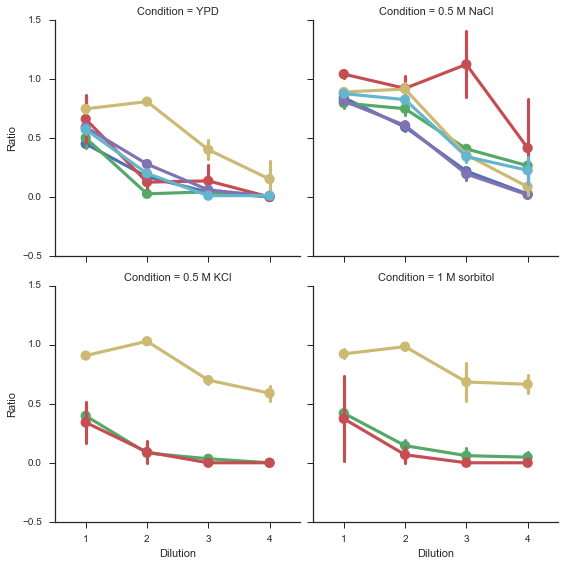

In [15]:
g = sns.factorplot(x='Dilution', y='Ratio', hue='Date', col='Condition', data=results, 
                   legend=False, col_wrap=2)
(g.set(ylim=(-0.5,1.5)))

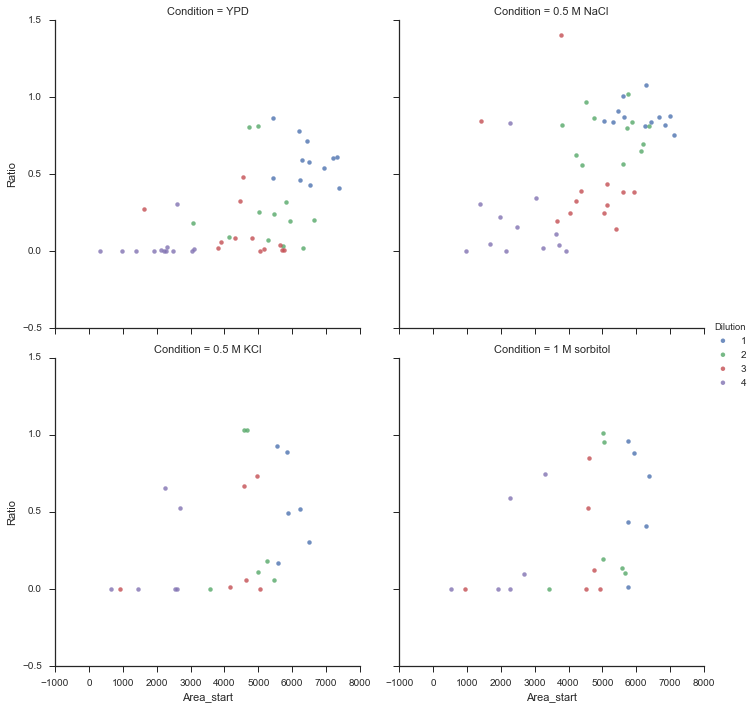

In [13]:
g = sns.lmplot(x='Area_start', y='Ratio', hue='Dilution', col='Condition', data=results, 
               ci=None, fit_reg=False, col_wrap=2)
(g.set(ylim=(-0.5,1.5)))

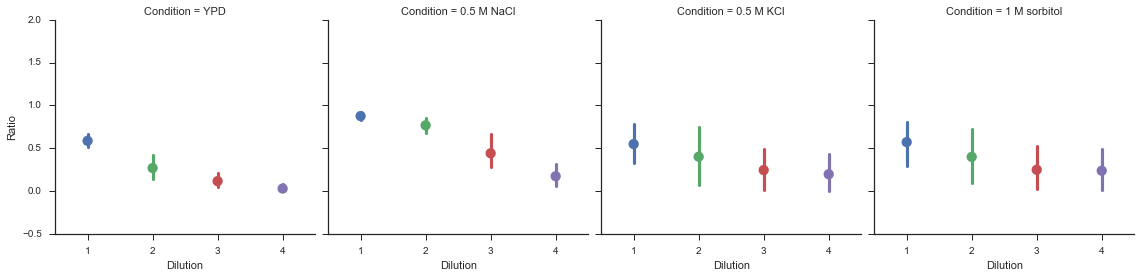

In [14]:
g = sns.factorplot(x='Dilution', y='Ratio', hue='Dilution', col='Condition', data=results)
(g.set(ylim=(-0.5,2)))

In [16]:
grouped = results.groupby('Sample', sort=False)
max_dilutions = {}
for name, group in grouped:
    dils = group['Dilution'].tolist()
    max_dil = 0
    for d in dils:
        ratio = group.Ratio[group.Dilution == d].iat[0]
        if ratio >= 0.5:
            max_dil = d
        else: break
    max_dilutions[name] = [max_dil]
print max_dilutions

{'20160610 F4': [2], '20160608 H1': [2], '20160608 H2': [2], '20160519 H6': [2], '20160519 H5': [2], '20160610 H4': [4], '20160608 G1': [1], '20160601 F3': [3], '20160608 G2': [1], '20160601 F4': [4], '20160622 H1': [2], '20160610 F3': [2], '20160521 H12': [0], '20160622 H2': [2], '20160521 H11': [0], '20160622 G1': [1], '20160601 H3': [0], '20160601 H4': [1], '20160622 G2': [1], '20160521 F11': [2], '20160521 F12': [2], '20160521 G11': [0], '20160521 G12': [0], '20160601 G4': [1], '20160610 G3': [4], '20160601 G3': [0], '20160601 E4': [0], '20160519 G6': [0], '20160521 E12': [0], '20160521 E11': [1], '20160601 E3': [1], '20160610 E3': [2], '20160610 H3': [4], '20160610 E4': [2], '20160519 G5': [0], '20160610 G4': [4]}


In [17]:
dilution_df = pd.DataFrame.from_dict(max_dilutions, orient='index')
dilution_df.index.name = 'Sample'
dilution_df = dilution_df.rename(columns = {0:'Max Dilution'})
dilution_df.reset_index(level=['Sample'], inplace=True)
dilution_df[:5]

,Sample,Max Dilution
0,20160610 F4,2
1,20160608 H1,2
2,20160608 H2,2
3,20160519 H6,2
4,20160519 H5,2


In [18]:
info = results[['Sample', 'Date', 'Well', 'Strain', 'Condition']]
info.drop_duplicates(inplace=True)
info[:4]

//anaconda/lib/python2.7/site-packages/pandas/util/decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


,Sample,Date,Well,Strain,Condition
0,20160519 G5,20160519,G5,116A,YPD
4,20160519 G6,20160519,G6,116A,YPD
8,20160519 H5,20160519,H5,116A,0.5 M NaCl
12,20160519 H6,20160519,H6,116A,0.5 M NaCl


In [19]:
max_dilution_results = pd.merge(dilution_df, info, how='inner', on=('Sample'), sort=True)
max_dilution_results[:5]

,Sample,Max Dilution,Date,Well,Strain,Condition
0,20160519 G5,0,20160519,G5,116A,YPD
1,20160519 G6,0,20160519,G6,116A,YPD
2,20160519 H5,2,20160519,H5,116A,0.5 M NaCl
3,20160519 H6,2,20160519,H6,116A,0.5 M NaCl
4,20160521 E11,1,20160521,E11,116A,YPD


In [1]:
g = sns.boxplot(x='Condition', y='Max Dilution', data=max_dilution_results)
g = sns.swarmplot(x='Condition', y='Max Dilution', hue='Date', data=max_dilution_results) #, color="black")
g.legend(bbox_to_anchor=(1.2, 1))
(g.set(ylim=(-0.5,4.5), title=strain))
plt.xlabel('')
plt.ylabel('Max Dilution with Ratio >= 0.5')
#plt.savefig('/Users/nwespe/Desktop/'+strain+'_HU_survival.jpg', bbox_inches='tight')

NameError: name 'sns' is not defined

In [67]:
max_grouped = max_dilution_results.groupby('Condition', sort=False)
max_count = max_grouped['Max Dilution'].count()
max_count = max_count.rename('N')
avgs = max_grouped['Max Dilution'].agg([np.mean, np.std, np.median])
summary = avgs.join(max_count)
#summary.reset_index(inplace=True)
summary['Strain'] = strain
summary = summary[['Strain', 'N', 'mean', 'std', 'median']]
summary

,Strain,N,mean,std,median
Condition,,,,,
YPD,116A,12,0.833333,0.717741,1.0
0.5 M NaCl,116A,12,2.250000,0.621582,2.0
0.5 M KCl,116A,6,1.500000,1.974842,0.5
1 M sorbitol,116A,6,1.500000,1.974842,0.5


In [68]:
df = max_dilution_results.groupby(['Condition', 'Max Dilution']).size().reset_index(name='count')
df = df.pivot(index='Condition', columns='Max Dilution', values='count')
summary = summary.join(df)

In [71]:
summary.reset_index(inplace=True)

In [72]:
summary

,Condition,Strain,N,mean,std,median,0,1,2,3,4
0,YPD,116A,12,0.833333,0.717741,1.0,4.0,6.0,2.0,NaN,NaN
1,0.5 M NaCl,116A,12,2.250000,0.621582,2.0,NaN,NaN,10.0,1.0,1.0
2,0.5 M KCl,116A,6,1.500000,1.974842,0.5,3.0,1.0,NaN,NaN,2.0
3,1 M sorbitol,116A,6,1.500000,1.974842,0.5,3.0,1.0,NaN,NaN,2.0


In [23]:
strain_summary = pd.read_csv('/Users/nwespe/Dropbox/Research - Data/PG HU Experiments/HU_survival_summary.csv', converters ={'Strain': lambda x: str(x)})

In [24]:
strain_summary[:4]

,Unnamed: 0,Condition,sum,mean,std,median,mode,N,Strain
0,0,YPD,2,0.142857,0.363137,0.0,"ModeResult(mode=array([0]), count=array([12]))",14,034A
1,1,0.5 M NaCl,52,3.714286,0.611250,4.0,"ModeResult(mode=array([4]), count=array([11]))",14,034A
2,2,0.5 M KCl,1,0.166667,0.408248,0.0,"ModeResult(mode=array([0]), count=array([5]))",6,034A
3,3,1 M sorbitol,1,0.166667,0.408248,0.0,"ModeResult(mode=array([0]), count=array([5]))",6,034A


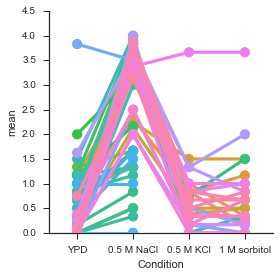

In [25]:
p = sns.factorplot(x='Condition', y='mean', hue='Strain', data=strain_summary, legend=False
                   )
(p.set(ylim=(0,4.5)))

In [26]:
def category(mean):
    if mean < 1:
        category = '-'
    elif mean < 2:
        category = '+'
    elif mean < 3:
        category = '++'
    else:
        category = '+++'
    return category

In [27]:
strain_summary['Survival'] = strain_summary['mean'].apply(category)

In [28]:
strain_summary[:5]

,Unnamed: 0,Condition,sum,mean,std,median,mode,N,Strain,Survival
0,0,YPD,2,0.142857,0.363137,0.0,"ModeResult(mode=array([0]), count=array([12]))",14,034A,-
1,1,0.5 M NaCl,52,3.714286,0.611250,4.0,"ModeResult(mode=array([4]), count=array([11]))",14,034A,+++
2,2,0.5 M KCl,1,0.166667,0.408248,0.0,"ModeResult(mode=array([0]), count=array([5]))",6,034A,-
3,3,1 M sorbitol,1,0.166667,0.408248,0.0,"ModeResult(mode=array([0]), count=array([5]))",6,034A,-
4,0,YPD,1,0.166667,0.408248,0.0,"ModeResult(mode=array([0]), count=array([5]))",6,100,-
